In [1]:
import pyreadstat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import ParameterGrid

In [17]:
training_data = pd.read_csv(r'C:\Users\Asus\Downloads/hip_fracture_training.csv')

In [18]:
training_data.head()

,HIP_PREOP_DEMENTIA,HIP_PREOP_DELIRIUM,HIP_PREOP_BONEMEDS,HIP_PREOP_MOBAID,HIP_PREOP_PRESSORE,HIP_MED_COMGMT,HIP_STDCARE,HIP_WBAT_POD1,HIP_DVT_28D,HIP_FRACTYPE,HIP_PATHFRAC,HIP_POST_PRESSORE,HIP_POST_DELIRIUM,HIP_POST_MOBAID,HIP_POST_BONEMEDS,SEX,RACE_NEW,ETHNICITY_HISPANIC,CPT,WORKRVU,INOUT,TRANST,AGE,OPERYR,DISCHDEST,ANESTHES,ELECTSURG,HEIGHT,WEIGHT,DIABETES,SMOKE,DYSPNEA,FNSTATUS2,VENTILAT,HXCOPD,ASCITES,HXCHF,HYPERMED,RENAFAIL,DIALYSIS,DISCANCR,WNDINF,STEROID,WTLOSS,BLEEDIS,TRANSFUS,PRSEPIS,PRSODM,PRBUN,PRCREAT,PRWBC,PRHCT,PRPLATE,EMERGNCY,ASACLAS,OPTIME,TOTHLOS,ADMQTR,HTOODAY,NSUPINFEC,SUPINFEC,SSSIPATOS,NWNDINFD,WNDINFD,DSSIPATOS,NORGSPCSSI,ORGSPCSSI,OSSIPATOS,NDEHIS,DEHIS,NOUPNEUMO,OUPNEUMO,PNAPATOS,NREINTUB,REINTUB,NPULEMBOL,PULEMBOL,NFAILWEAN,FAILWEAN,VENTPATOS,NRENAINSF,RENAINSF,NOPRENAFL,OPRENAFL,NURNINFEC,URNINFEC,UTIPATOS,NCNSCVA,CNSCVA,NCDARREST,CDARREST,NCDMI,CDMI,NOTHBLEED,OTHBLEED,NOTHDVT,OTHDVT,NOTHSYSEP,OTHSYSEP,SEPSISPATOS,NOTHSESHOCK,OTHSESHOCK,SEPSHOCKPATOS,RETURNOR,DOPTODIS,OTHCDIFF,GenderData_1,GenderData_2,GenderData_3,RaceData_4,RaceData_5,RaceData_Black,RaceData_7,RaceData_8,RaceData_9,RaceData_10,RaceData_11,Ethnicity_14,TransferStatus_15,TransferStatus_16,TransferStatus_17,TransferStatus_18,TransferStatus_19,TransferStatus_20,DispoLocationPost_21,DispoLocationPost_22,DispoLocationPost_23,DispoLocationPost_24,DispoLocationPost_25,DispoLocationPost_26,DispoLocationPost_27,DispoLocationPost_28,DispoLocationPost_29,DispoLocationPost_30,DispoLocationPost_31,DispoLocationPost_32,SmokePre_37,DyspneaPre_38,DyspneaPre_39,DyspneaPre_40,FncStatusPre_41,FncStatusPre_42,FncStatusPre_43,FncStatusPre_44,VentDepPre_46,COPDPre_48,AscitesPre_50,CHFPre_52,HTNPre_54,DialysisPre_56,CancerPre_58,WoundInfectionPre_60,SteroidPre_62,WtLossPre_64,BleedingDisPre_66,TfnPre_68,SepsisPre_69,SepsisPre_70,SepsisPre_71,SepsisPre_72,ASAPre_73,ASAPre_74,ASAPre_75,ASAPre_76,ASAPre_77,ASAPre_78,SSIPost_80,DeepSSIPost_81,OrganSpacePost_84,WoundDisruptionPost_86,PneumoniaPost_88,ReintubPost_90,PulmEmbPost_92,VentPost_94,ProgRenalPost_96,AcuterenalPost_97,UTIPost_100,CardiacArrestPost_103,MIPost_105,BleedingTfnPost_108,DVTPost_109,SepsisPost_112,SepticShockPost_114,ReOPPost_116,BMI,ObesityBinary,CardiacComplications,InfectiousComplications,Stroke_2,PreOpDementia_2,PreOpDelirium_5,PreOpBoneMeds_7,PreOpMOBAID_10,PreOpPressSore_12,MEDMGMT_13,MEDMGMT_14,MEDMGMT_15,StandardHip_17,WBATPOD1_18,WBATPOD1_21,DVTProphylaxisPost28_24,PostOpPRESSORE_26,PostOpDelirium_29,PostOpMobAid_33,PostOpBoneMed_35,HipFractureType_44,HipFractureType_45,HipFractureType_46,HipFractureType_47,HipFractureType_48,PathologicHipFractures_49,PathologicHipFractures_50,PathologicHipFractures_51,MinorityPatient,DischargeNotHome,PartialorFullFuncStatus,DiabetesBinary,MFI5,READMISSION30D
0,No,No,No,No,No,Yes-co-management throughout stay,Yes,Yes,Yes,"Femoral neck fracture (subcapital, Garden types 3 and 4)-displaced",None,No,No,Yes,Yes,female,White,NaN,27236,17.61,Inpatient,Not transferred (admitted from home),73,2016,Rehab,Spinal,No,60,115,NO,No,No,Independent,No,No,No,No,No,No,No,No,No,No,No,No,No,None,139.0,17.0,0.67,11.6,36.4,252.0,No,2-Mild Disturb,101,5,4,1,0,No Complication,No,0,No Complication,No,0,No Complication,No,0,No Complication,0,No Complication,No,0,No Complication,0,No Complication,0,No Complication,No,0,No Complication,0,No Complication,0,No Complication,No,0,No Complication,0,No Complication,0,No Complication,0,No Complication,0,No Complication,0,No Complication,No,0,No Complication,No,No,4,No Complication,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.456944,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,Yes,Yes,Yes,No,No,Yes-co-management throughout stay,No,Yes,No,"Femoral neck fracture (subcapital, Garden types 1 and 2)-undisplaced",None,No,Yes,Yes,Yes,female,White,NaN,27236,17.61,Inpatient,Not transferred (admitted from 

In [19]:
training_data.shape

(29188, 219)

In [20]:
for col in training_data.columns:
    print(col)

HIP_PREOP_DEMENTIA
HIP_PREOP_DELIRIUM
HIP_PREOP_BONEMEDS
HIP_PREOP_MOBAID
HIP_PREOP_PRESSORE
HIP_MED_COMGMT
HIP_STDCARE
HIP_WBAT_POD1
HIP_DVT_28D
HIP_FRACTYPE
HIP_PATHFRAC
HIP_POST_PRESSORE
HIP_POST_DELIRIUM
HIP_POST_MOBAID
HIP_POST_BONEMEDS
SEX
RACE_NEW
ETHNICITY_HISPANIC
CPT
WORKRVU
INOUT
TRANST
AGE
OPERYR
DISCHDEST
ANESTHES
ELECTSURG
HEIGHT
WEIGHT
DIABETES
SMOKE
DYSPNEA
FNSTATUS2
VENTILAT
HXCOPD
ASCITES
HXCHF
HYPERMED
RENAFAIL
DIALYSIS
DISCANCR
WNDINF
STEROID
WTLOSS
BLEEDIS
TRANSFUS
PRSEPIS
PRSODM
PRBUN
PRCREAT
PRWBC
PRHCT
PRPLATE
EMERGNCY
ASACLAS
OPTIME
TOTHLOS
ADMQTR
HTOODAY
NSUPINFEC
SUPINFEC
SSSIPATOS
NWNDINFD
WNDINFD
DSSIPATOS
NORGSPCSSI
ORGSPCSSI
OSSIPATOS
NDEHIS
DEHIS
NOUPNEUMO
OUPNEUMO
PNAPATOS
NREINTUB
REINTUB
NPULEMBOL
PULEMBOL
NFAILWEAN
FAILWEAN
VENTPATOS
NRENAINSF
RENAINSF
NOPRENAFL
OPRENAFL
NURNINFEC
URNINFEC
UTIPATOS
NCNSCVA
CNSCVA
NCDARREST
CDARREST
NCDMI
CDMI
NOTHBLEED
OTHBLEED
NOTHDVT
OTHDVT
NOTHSYSEP
OTHSYSEP
SEPSISPATOS
NOTHSESHOCK
OTHSESHOCK
SEPSHOCKPATOS
RETURNO

In [7]:
def filter_data(df, postop_cols): 

    # filters for only the preoperative columns
    df_postop = df[postop_cols]

    return df_postop 

In [21]:
post_cols = [
    'SSIPost_80', 'DeepSSIPost_81', 'OrganSpacePost_84', 'WoundDisruptionPost_86',
    'PneumoniaPost_88', 'ReintubPost_90', 'PulmEmbPost_92', 'VentPost_94',
    'ProgRenalPost_96', 'AcuterenalPost_97', 'UTIPost_100', 'CardiacArrestPost_103',
    'MIPost_105', 'BleedingTfnPost_108', 'DVTPost_109', 'SepsisPost_112',
    'ReOPPost_116', 'CardiacComplications', 'InfectiousComplications', 'Stroke_2', 'WBATPOD1_21',
    'PostOpPRESSORE_26', 'PostOpDelirium_29', 'PostOpMobAid_33', 'PostOpBoneMed_35','READMISSION30D'
]
post_df = filter_data(training_data, post_cols)

print(post_df.shape)

#print(post_df.TransferStatus_20.dtype)

(29188, 26)


In [22]:
post_df.head()

,SSIPost_80,DeepSSIPost_81,OrganSpacePost_84,WoundDisruptionPost_86,PneumoniaPost_88,ReintubPost_90,PulmEmbPost_92,VentPost_94,ProgRenalPost_96,AcuterenalPost_97,UTIPost_100,CardiacArrestPost_103,MIPost_105,BleedingTfnPost_108,DVTPost_109,SepsisPost_112,ReOPPost_116,CardiacComplications,InfectiousComplications,Stroke_2,WBATPOD1_21,PostOpPRESSORE_26,PostOpDelirium_29,PostOpMobAid_33,PostOpBoneMed_35,READMISSION30D
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1


In [23]:
post_df.isnull().values.any()

False

In [24]:
post_df.isnull().sum()

SSIPost_80                 0
DeepSSIPost_81             0
OrganSpacePost_84          0
WoundDisruptionPost_86     0
PneumoniaPost_88           0
ReintubPost_90             0
PulmEmbPost_92             0
VentPost_94                0
ProgRenalPost_96           0
AcuterenalPost_97          0
UTIPost_100                0
CardiacArrestPost_103      0
MIPost_105                 0
BleedingTfnPost_108        0
DVTPost_109                0
SepsisPost_112             0
ReOPPost_116               0
CardiacComplications       0
InfectiousComplications    0
Stroke_2                   0
WBATPOD1_21                0
PostOpPRESSORE_26          0
PostOpDelirium_29          0
PostOpMobAid_33            0
PostOpBoneMed_35           0
READMISSION30D             0
dtype: int64

In [25]:
def split_data(df): 
    X = df.drop(labels = ['READMISSION30D'], axis = 1) 
    y = pd.DataFrame(df['READMISSION30D']) 
    X_train,X_test,y_train,y_test = train_test_split(X, y, stratify = y, test_size= .2, random_state= 0 )
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = split_data(post_df)
display(X_train.info()) 
display(X_test.info())
display(y_train.info())
display(y_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23350 entries, 12914 to 4404
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   SSIPost_80               23350 non-null  int64
 1   DeepSSIPost_81           23350 non-null  int64
 2   OrganSpacePost_84        23350 non-null  int64
 3   WoundDisruptionPost_86   23350 non-null  int64
 4   PneumoniaPost_88         23350 non-null  int64
 5   ReintubPost_90           23350 non-null  int64
 6   PulmEmbPost_92           23350 non-null  int64
 7   VentPost_94              23350 non-null  int64
 8   ProgRenalPost_96         23350 non-null  int64
 9   AcuterenalPost_97        23350 non-null  int64
 10  UTIPost_100              23350 non-null  int64
 11  CardiacArrestPost_103    23350 non-null  int64
 12  MIPost_105               23350 non-null  int64
 13  BleedingTfnPost_108      23350 non-null  int64
 14  DVTPost_109              23350 non-null  int64
 15 

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5838 entries, 28216 to 13720
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   SSIPost_80               5838 non-null   int64
 1   DeepSSIPost_81           5838 non-null   int64
 2   OrganSpacePost_84        5838 non-null   int64
 3   WoundDisruptionPost_86   5838 non-null   int64
 4   PneumoniaPost_88         5838 non-null   int64
 5   ReintubPost_90           5838 non-null   int64
 6   PulmEmbPost_92           5838 non-null   int64
 7   VentPost_94              5838 non-null   int64
 8   ProgRenalPost_96         5838 non-null   int64
 9   AcuterenalPost_97        5838 non-null   int64
 10  UTIPost_100              5838 non-null   int64
 11  CardiacArrestPost_103    5838 non-null   int64
 12  MIPost_105               5838 non-null   int64
 13  BleedingTfnPost_108      5838 non-null   int64
 14  DVTPost_109              5838 non-null   int64
 15 

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23350 entries, 12914 to 4404
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   READMISSION30D  23350 non-null  int64
dtypes: int64(1)
memory usage: 364.8 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5838 entries, 28216 to 13720
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   READMISSION30D  5838 non-null   int64
dtypes: int64(1)
memory usage: 91.2 KB


None

In [29]:
def rf_feature_importance(X_train,X_test,y_train): 

    #we will start off using the default scikit learn features 
    rf_model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=5,n_estimators=1000,
                                 max_features=0.1,max_samples=0.7,random_state=0)
     #Fit the tree to the data
    rf_model.fit(X_train, y_train)

    #predict on the validation set
    preds = rf_model.predict(X_test)

    #define feature names 
    feat_names = X_train.columns 

    #define the number of features to show
    num_to_show = 24 

    # Determine the relative importance of each feature using the random forest model
    importances = rf_model.feature_importances_

    # Get an array of the indices that would sort "importances" in reverse order to get largest to smallest
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        feat_name = feat_names[indices[i]]
        ranked_feats.append(feat_name)
    RF_ranking = pd.DataFrame()
    RF_ranking['Feat Index'] = indices
    RF_ranking['Feature'] = ranked_feats
    RF_ranking['Importance'] = np.sort(importances)[::-1]
    display(RF_ranking.iloc[:num_to_show,:])

    # Plot the importance value for each feature
    RF_ranking[:30][::-1].plot(x='Feature',y='Importance',kind='barh',figsize=(12,7),legend=False,title='RF Feature Importance')
    plt.show()

    return RF_ranking, rf_model, preds

C:\Users\Asus\AppData\Local\Temp\ipykernel_43524\3419889737.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


,Feat Index,Feature,Importance
0,16,ReOPPost_116,0.353421
1,18,InfectiousComplications,0.166753
2,15,SepsisPost_112,0.085193
3,4,PneumoniaPost_88,0.062552
4,10,UTIPost_100,0.042942
5,12,MIPost_105,0.037355
6,6,PulmEmbPost_92,0.032750
7,17,CardiacComplications,0.031826
8,2,OrganSpacePost_84,0.021927
9,21,PostOpPRESSORE_26,0.019203


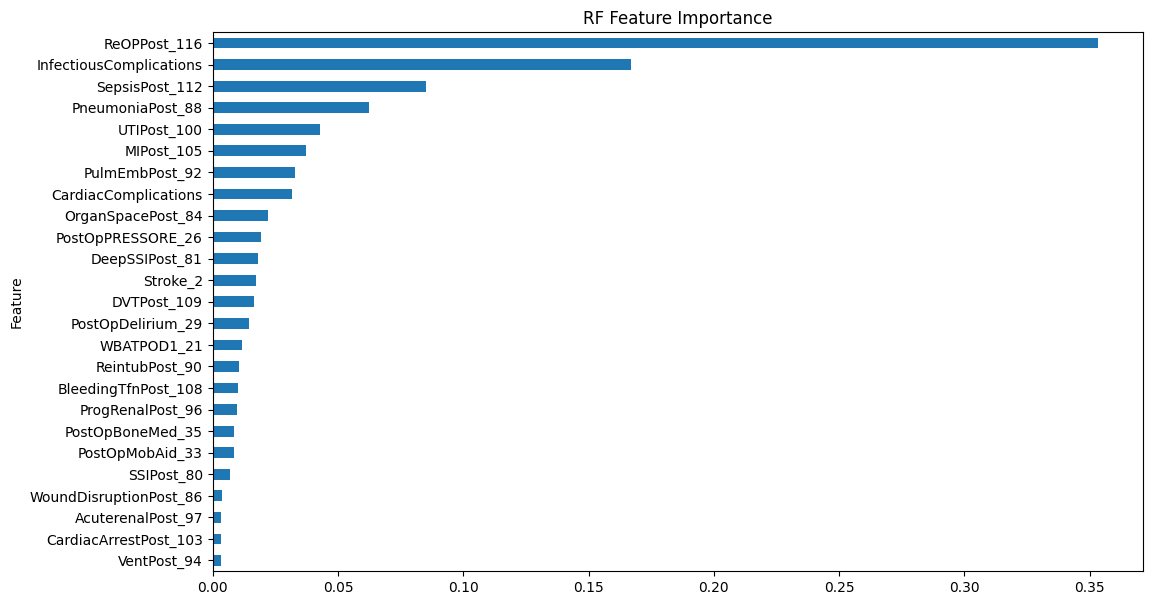

In [30]:
RF_ranking, rf_model, preds = rf_feature_importance(X_train,X_test,y_train)

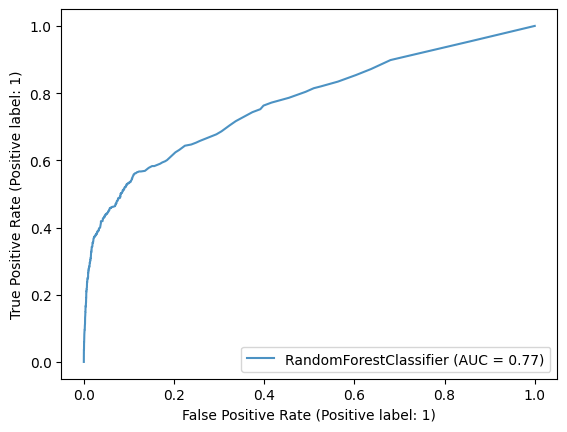

In [38]:
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rf_model, X_test, y_test, alpha=0.8)
plt.show()